In [ ]:
import pandas as pd

# Load the cleaned Bitcoin tweets dataset
file_path = "../datasets/curated_final_tweets_dataset.parquet"  # Update the path if needed
tweets_df = pd.read_parquet(file_path)

# Convert 'date' column to datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

# Display first few rows
tweets_df.head()



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,year_month
1,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301,1075,361,True,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,['crypto'],Twitter Web App,False,2021-02
2,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301,1075,361,True,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,"['Bitcoin', 'cryptocurrency', 'bitcoin', 'cryp...",Twitter Web App,False,2021-02
3,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301,1075,361,True,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,"['CryptoOutlook', 'cryptocurrency', 'bitcoin',...",Twitter Web App,False,2021-02
4,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301,1075,361,True,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...","['Blockchain', 'cryptocurrency', 'bitcoin', 'c...",Twitter Web App,False,2021-02
5,Nick Doevendans,"Edam-Volendam, Nederland","Amateur historicus m.n. WW2, schrijver, muziek...",2020-06-12 16:50:07,37,123,410,True,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",Twitter for iPhone,False,2021-02


In [3]:
# Remove duplicate tweets (if any)
tweets_df = tweets_df.drop_duplicates(subset=['text'])

# Remove unnecessary columns (modify as needed)
columns_to_keep = ['date', 'text', 'user_followers', 'is_retweet']
tweets_df = tweets_df[columns_to_keep]

# Display updated dataframe
tweets_df.head()

,date,text,user_followers,is_retweet
1,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,301,False
2,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,301,False
3,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,301,False
4,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",301,False
5,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,37,False


In [4]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters, numbers, punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text.strip()

# Apply cleaning
tweets_df['clean_text'] = tweets_df['text'].apply(clean_text)

# Display cleaned text column
tweets_df[['text', 'clean_text']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vamsisaigarapati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
1,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,weekend read keen learn crypto assets check re...
2,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,debunking bitcoin myths cryptocurrency bitcoin...
3,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,bloomberg lp cryptooutlook cryptocurrency bitc...
4,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",blockchain cryptocurrency bitcoin crypto block...
5,#reddcoin #rdd @reddcoin to the moon #altcoin ...,reddcoin rdd moon altcoin turnreddcoinindollar...


In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to compute sentiment score
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']  # Extract compound score

# Apply sentiment analysis
tweets_df['sentiment_score'] = tweets_df['clean_text'].apply(get_sentiment)

# Display sentiment scores
tweets_df[['clean_text', 'sentiment_score']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vamsisaigarapati/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,clean_text,sentiment_score
1,weekend read keen learn crypto assets check re...,0.4939
2,debunking bitcoin myths cryptocurrency bitcoin...,0.0000
3,bloomberg lp cryptooutlook cryptocurrency bitc...,0.0000
4,blockchain cryptocurrency bitcoin crypto block...,0.0000
5,reddcoin rdd moon altcoin turnreddcoinindollar...,0.0000


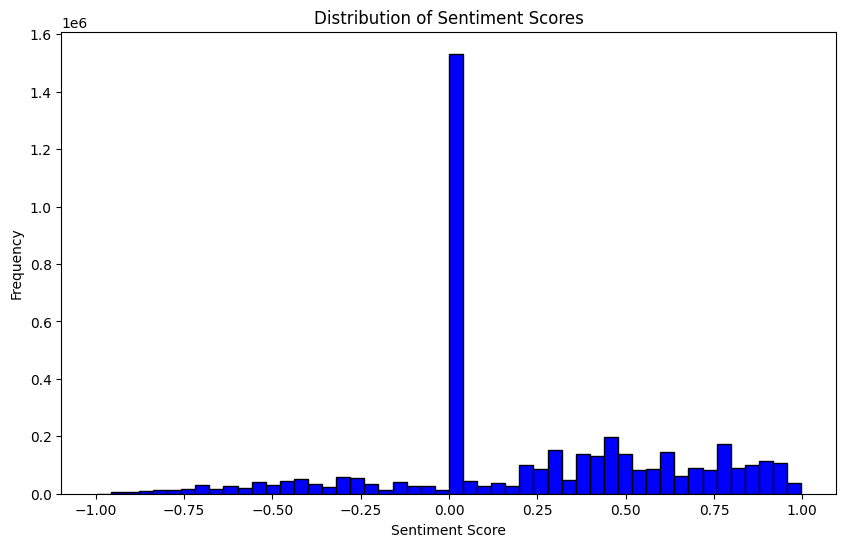

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(tweets_df['sentiment_score'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [7]:
from transformers import pipeline

# Load pre-trained sentiment analysis model (BERT-based)
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply BERT sentiment analysis
tweets_df['bert_sentiment'] = tweets_df['clean_text'].apply(lambda text: sentiment_pipeline(text)[0]['score'])

# Display BERT sentiment scores
tweets_df[['clean_text', 'sentiment_score', 'bert_sentiment']].head()

/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


KeyboardInterrupt: 

In [ ]:
# Aggregate sentiment scores by date (mean sentiment per day)
daily_sentiment = tweets_df.groupby(tweets_df['date'].dt.date)['sentiment_score'].mean().reset_index()

# Convert 'date' back to datetime format
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Display daily sentiment scores
daily_sentiment.head()

In [ ]:
# Save the aggregated daily sentiment data
daily_sentiment.to_parquet("../datasets/daily_sentiment.parquet", index=False)

print("Processed sentiment data saved as 'daily_sentiment.parquet'.")